<a href="https://colab.research.google.com/github/datascientist-ld1981/Speech-Recognition/blob/main/SR_simulated_ADC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y portaudio19-dev
!pip install sounddevice

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libportaudio2 libportaudiocpp0
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 188 kB of archives.
After this operation, 927 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudiocpp0 amd64 19.6.0-1.1 [16.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 portaudio19-dev amd64 19.6.0-1.1 [106 kB]
Fetched 188 kB in 0s (388 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1.

In [ ]:
#📌 Step 1: Load and Read harvard.wav
import scipy.io.wavfile as wav

file_name = "/content/harvard.wav"  # Ensure the file exists in this path
sampling_rate, audio_data = wav.read(file_name)

print(f"Loaded {file_name} with sampling rate {sampling_rate} Hz")

Loaded /content/harvard.wav with sampling rate 44100 Hz


<ipython-input-2-26dacc9523f7>:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, audio_data = wav.read(file_name)


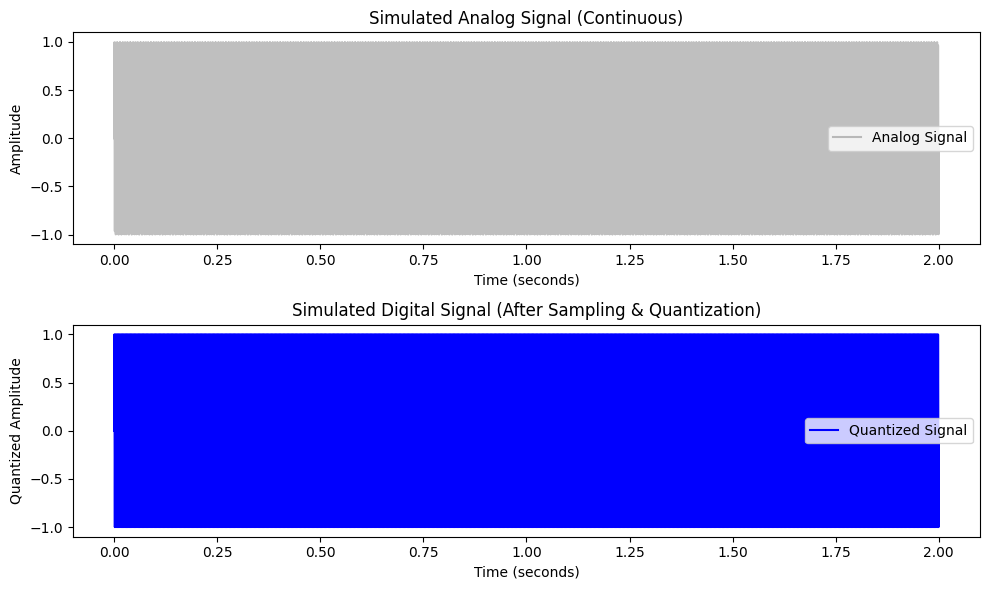

Duration of Audio: 2 seconds
Number of Samples (After Sampling): 88200
Sampled Signal (First 5 values): [0.         0.06264903 0.12505193 0.18696354 0.2481406 ]
Quantized Signal (First 5 values): [0.         0.06265259 0.12506104 0.18695068 0.24813843]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for simulation
sampling_rate = 44100  # 44.1 kHz (CD-quality audio)
duration = 2  # 2 seconds
bit_depth = 16  # 16-bit ADC (standard for CD)

# Generate a simulated analog signal (e.g., a sine wave)
t_analog = np.linspace(0, duration, 10000)  # Continuous time (high resolution)
analog_signal = np.sin(2 * np.pi * 440 * t_analog)  # 440 Hz sine wave (A4 pitch)

# Perform Sampling (using the specified sampling rate)
time_axis = np.linspace(0, duration, int(sampling_rate * duration))  # Discrete time axis
sampled_signal = np.sin(2 * np.pi * 440 * time_axis)  # Sampled signal at the given rate

# Perform Quantization (simulate 16-bit ADC)
# Quantization step size (this is the range of values divided by the bit depth)
quantization_levels = 2 ** bit_depth
quantized_signal = np.round(sampled_signal * (quantization_levels / 2)) / (quantization_levels / 2)

# Plot the analog signal (high-res continuous signal)
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t_analog, analog_signal, label="Analog Signal", color="gray", alpha=0.5)
plt.title("Simulated Analog Signal (Continuous)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()

# Plot the sampled & quantized digital signal
plt.subplot(2, 1, 2)
plt.plot(time_axis, quantized_signal, label="Quantized Signal", color="blue")
plt.title("Simulated Digital Signal (After Sampling & Quantization)")
plt.xlabel("Time (seconds)")
plt.ylabel("Quantized Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

# Print some values for verification
print("Duration of Audio:", duration, "seconds")
print("Number of Samples (After Sampling):", len(time_axis))
print("Sampled Signal (First 5 values):", sampled_signal[:5])
print("Quantized Signal (First 5 values):", quantized_signal[:5])


18.356190476190477 [0.00000000e+00 2.26757650e-05 4.53515299e-05 ... 1.83561451e+01
 1.83561678e+01 1.83561905e+01]


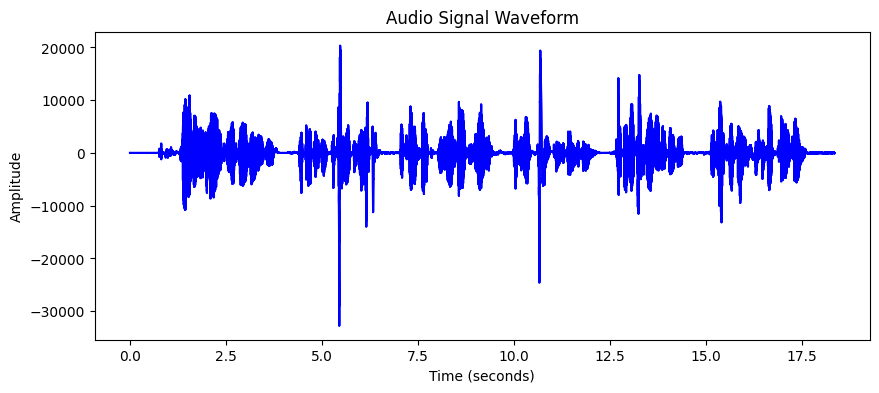

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

duration = len(audio_data) / sampling_rate
time_axis = np.linspace(0, duration, len(audio_data))
print(duration, time_axis)

plt.figure(figsize=(10, 4))
plt.plot(time_axis, audio_data, color='blue')
plt.title("Audio Signal Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

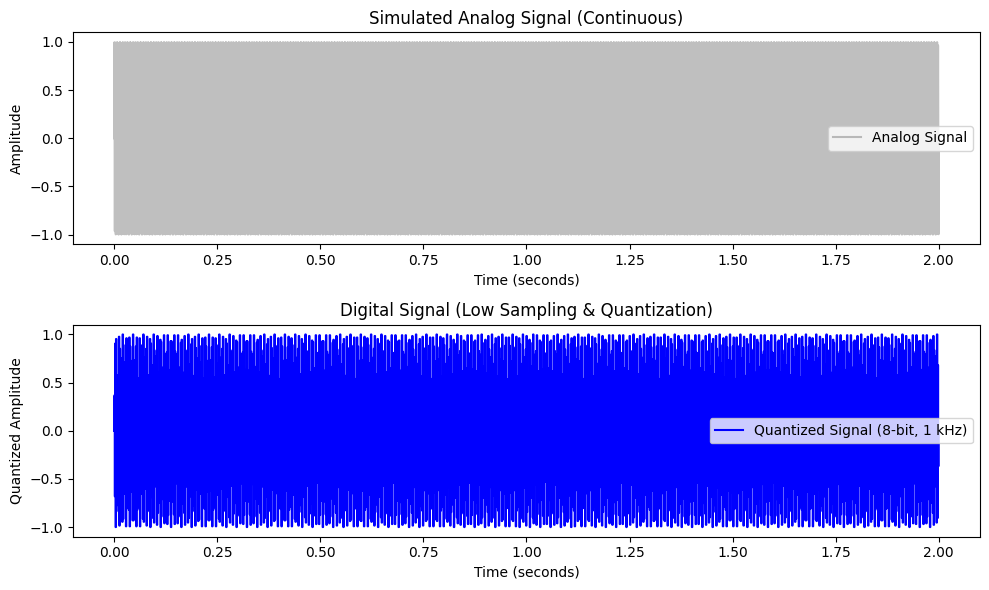

Duration of Audio: 2 seconds
Number of Samples (After Sampling): 2000
Sampled Signal (First 5 values): [ 0.          0.36683833 -0.68252817  0.90305272 -0.9976641 ]
Quantized Signal (First 5 values): [ 0.         0.3671875 -0.6796875  0.90625   -1.       ]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for simulation
sampling_rate = 1000  # Reduced to 1 kHz (to observe aliasing)
duration = 2  # 2 seconds
bit_depth = 8  # Reduced bit depth (to observe quantization noise)

# Generate a simulated analog signal (440 Hz sine wave)
t_analog = np.linspace(0, duration, 10000)  # Continuous time (high resolution)
analog_signal = np.sin(2 * np.pi * 440 * t_analog)  # 440 Hz sine wave

# Perform Sampling (reduced sampling rate)
time_axis = np.linspace(0, duration, int(sampling_rate * duration))  # Discrete time axis
sampled_signal = np.sin(2 * np.pi * 440 * time_axis)  # Sampled at lower rate

# Perform Quantization (simulate 8-bit ADC)
quantization_levels = 2 ** bit_depth  # 256 levels for 8-bit
quantized_signal = np.round(sampled_signal * (quantization_levels / 2)) / (quantization_levels / 2)

# Plot the analog signal
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t_analog, analog_signal, label="Analog Signal", color="gray", alpha=0.5)
plt.title("Simulated Analog Signal (Continuous)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()

# Plot the sampled & quantized digital signal
plt.subplot(2, 1, 2)
plt.step(time_axis, quantized_signal, label="Quantized Signal (8-bit, 1 kHz)", color="blue", where='mid')
plt.title("Digital Signal (Low Sampling & Quantization)")
plt.xlabel("Time (seconds)")
plt.ylabel("Quantized Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

# Print verification values
print("Duration of Audio:", duration, "seconds")
print("Number of Samples (After Sampling):", len(time_axis))
print("Sampled Signal (First 5 values):", sampled_signal[:5])
print("Quantized Signal (First 5 values):", quantized_signal[:5])


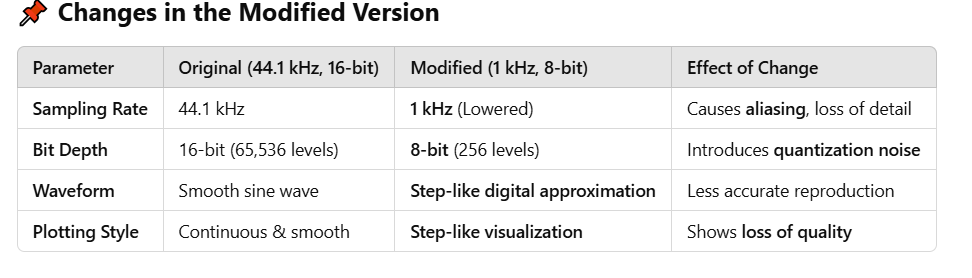